In [87]:
"""
Code by Michael Klein
ASTR400B
This code will answer the questions outlined by Dr. Gurtina in her ResearchAssignment PDF. Specifically,
we will compute the density profile of the disk/bulge of the M31/MW remnant using a Mass-to-Light ratio of 1.
We will then compare it to a sersic profile(Lab 6) and ###Question about Concentration### including before the 
merger and right before final coalescence.
"""

'\nCode by Michael Klein\nASTR400B\nThis code will answer the questions outlined by Dr. Gurtina in her ResearchAssignment PDF. Specifically,\nwe will compute the density profile of the disk/bulge of the M31/MW remnant using a Mass-to-Light ratio of 1.\nWe will then compare it to a sersic profile(Lab 6) and ###Question about Concentration### including before the \nmerger and right before final coalescence.\n'

In [88]:
# Import relevant modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from MassDistributionRes import MassProfile # This will be used for the Sersic profile comparison as well as for 
# the density profile
from ReadFile import read # This will read files
from CenterOfMass import CenterOfMass # This will import the center of mass position and velocity functions
# ADD MORE IF NEEDED


In [89]:
# Lab 6 
# Create an instance of the mass profile class for MW and M31
MW = MassProfile('MW',0)
M31 = MassProfile('M31',0)
# Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1
r = np.arange(0.1,30,0.1)

In [90]:
# Define a new array DiskMass and BulgeMass for MW and M31 respectively that uses MassEnclosed within 
# MassDistributionRes to compute the mass profile of the disk and bulge
DiskMassMW = MW.MassEnclosed(2,r) 
DiskMassM31 = M31.MassEnclosed(2,r) 
BulgeMassMW = MW.MassEnclosed(3,r)
BulgeMassM31 = M31.MassEnclosed(3,r)

In [91]:
# Compute the density profile using I = L/(4*pi*d**2) if we are assuming M/L~1, where I is apparent brightness
DiskIMW = DiskMassMW/4/np.pi/r**2
DiskIM31 = DiskMassM31/4/np.pi/r**2
BulgeIMW = BulgeMassMW/4/np.pi/r**2
BulgeIM31 = BulgeMassM31/4/np.pi/r**2

In [92]:
# Computing the half-light radius/half-mass radius, since we are assuming M/L~1
DiskTotalMW = np.max(DiskMassMW)
DiskTotalM31 = np.max(DiskMassM31)
BulgeTotalMW = np.max(BulgeMassMW)
BulgeTotalM31 = np.max(BulgeMassM31)

In [93]:
DiskMWLow = DiskTotalMW/2 # Low half-mass
DiskM31Low = DiskTotalM31/2
BulgeMWLow = BulgeTotalMW/2
BulgeM31Low = BulgeTotalM31/2
DiskMWHigh = DiskTotalMW/2 + DiskTotalMW/2*0.01 # High half-mass
DiskM31High = DiskTotalM31/2 + DiskTotalM31/2*0.01
BulgeMWHigh = BulgeTotalMW/2 + BulgeTotalMW/2*0.01
BulgeM31High = BulgeTotalM31/2 + BulgeTotalM31/2*0.01

In [94]:
# Indices that will chose where DiskMass and BulgeMass are less than the high value or greater than the low value
index1 = np.where(DiskMassMW > DiskMWLow) #& (DiskMassMW < DiskMWHigh) ) 
index2 = np.where(DiskMassM31 > DiskM31Low) #& (DiskMassM31 < DiskM31High) )
index3 = np.where(BulgeMassMW > BulgeMWLow) #& (BulgeMassMW < BulgeMWHigh) )
index4 = np.where(BulgeMassM31 > BulgeM31Low) #& (BulgeMassM31 < BulgeM31High) )
#print(index1)
#print(index2)
#print(index3)
#print(index4)

In [95]:
# The half-mass radius Re
Re1 = r[index1][0]
Re2 = r[index2][0]
Re3 = r[index3][0]
Re4 = r[index4][0]
print(Re1)
### Could I use this to determine the actual M/L ratio? ###

4.8


In [96]:
# The Sersic profile from Lab 6
"""A function that returns the Sersic Profile in terms of the effective radus (the half-light radius) 
for an elliptical system """
def BulgeSersic1(r, Re1, n, Mtot):
    """ Inputs:
 Re : effective radius or half-light radius (kpc)
 n : the Sersic index
 R : array of radii (kpc)
 Mtot : the total stellar mass (Msun)
 Returns:
 Surface brightness profile in (Lsun/kpc**2)
 
 Assuming the M/L ~ 1"""
    L1 = Mtot # Total luminosity is equal to the total stellar mass
    
    # Ie = L / (7.2 * pi * Re**2)
    Ie1 = L1 / (7.2 * np.pi * Re1**2)
    
    # The exponent
    A1 = (r/Re1)**(1/n) - 1
    
    return Ie1*np.exp(-7.67*A1)

In [97]:
# The Sersic profile from Lab 6
"""A function that returns the Sersic Profile in terms of the effective radus (the half-light radius) 
for an elliptical system """
def BulgeSersic2(r, Re2, n, Mtot):
    """ Inputs:
 Re : effective radius or half-light radius (kpc)
 n : the Sersic index
 R : array of radii (kpc)
 Mtot : the total stellar mass (Msun)
 Returns:
 Surface brightness profile in (Lsun/kpc**2)
 
 Assuming the M/L ~ 1"""
    L2 = Mtot # Total luminosity is equal to the total stellar mass
    
    # Ie = L / (7.2 * pi * Re**2)
    Ie2 = L2 / (7.2 * np.pi * Re2**2)
    
    # The exponent
    A2 = (r/Re2)**(1/n) - 1
    
    return Ie2*np.exp(-7.67*A2)

In [98]:
# The Sersic profile from Lab 6
"""A function that returns the Sersic Profile in terms of the effective radus (the half-light radius) 
for an elliptical system """
def BulgeSersic3(r, Re3, n, Mtot):
    """ Inputs:
 Re : effective radius or half-light radius (kpc)
 n : the Sersic index
 R : array of radii (kpc)
 Mtot : the total stellar mass (Msun)
 Returns:
 Surface brightness profile in (Lsun/kpc**2)
 
 Assuming the M/L ~ 1"""
    L3 = Mtot # Total luminosity is equal to the total stellar mass
    
    # Ie = L / (7.2 * pi * Re**2)
    Ie3 = L3 / (7.2 * np.pi * Re3**2)
    
    # The exponent
    A3 = (r/Re3)**(1/n) - 1
    
    return Ie3*np.exp(-7.67*A3)

In [99]:
# The Sersic profile from Lab 6
"""A function that returns the Sersic Profile in terms of the effective radus (the half-light radius) 
for an elliptical system """
def BulgeSersic4(r, Re4, n, Mtot):
    """ Inputs:
 Re : effective radius or half-light radius (kpc)
 n : the Sersic index
 R : array of radii (kpc)
 Mtot : the total stellar mass (Msun)
 Returns:
 Surface brightness profile in (Lsun/kpc**2)
 
 Assuming the M/L ~ 1"""
    L4 = Mtot # Total luminosity is equal to the total stellar mass
    
    # Ie = L / (7.2 * pi * Re**2)
    Ie4 = L4 / (7.2 * np.pi * Re4**2)
    
    # The exponent
    A4 = (r/Re4)**(1/n) - 1
    
    return Ie4*np.exp(-7.67*A4)

In [100]:
BulgeSersic1(r,Re1,4,DiskTotalMW)

<Quantity [1.66999664e+10, 9.62210328e+09, 6.64840224e+09, 4.99481749e+09,
           3.94313184e+09, 3.21802325e+09, 2.69010841e+09, 2.29030032e+09,
           1.97828977e+09, 1.72896673e+09, 1.52587861e+09, 1.35780245e+09,
           1.21682660e+09, 1.09721872e+09, 9.94727931e+08, 9.06138470e+08,
           8.28975176e+08, 7.61303789e+08, 7.01592312e+08, 6.48612760e+08,
           6.01370204e+08, 5.59050706e+08, 5.20982512e+08, 4.86606766e+08,
           4.55455110e+08, 4.27132382e+08, 4.01303096e+08, 3.77680792e+08,
           3.56019559e+08, 3.36107249e+08, 3.17759986e+08, 3.00817712e+08,
           2.85140528e+08, 2.70605693e+08, 2.57105129e+08, 2.44543344e+08,
           2.32835700e+08, 2.21906949e+08, 2.11689996e+08, 2.02124860e+08,
           1.93157770e+08, 1.84740413e+08, 1.76829271e+08, 1.69385058e+08,
           1.62372236e+08, 1.55758586e+08, 1.49514847e+08, 1.43614387e+08,
           1.38032930e+08, 1.32748303e+08, 1.27740227e+08, 1.22990119e+08,
           1.18480926e+08

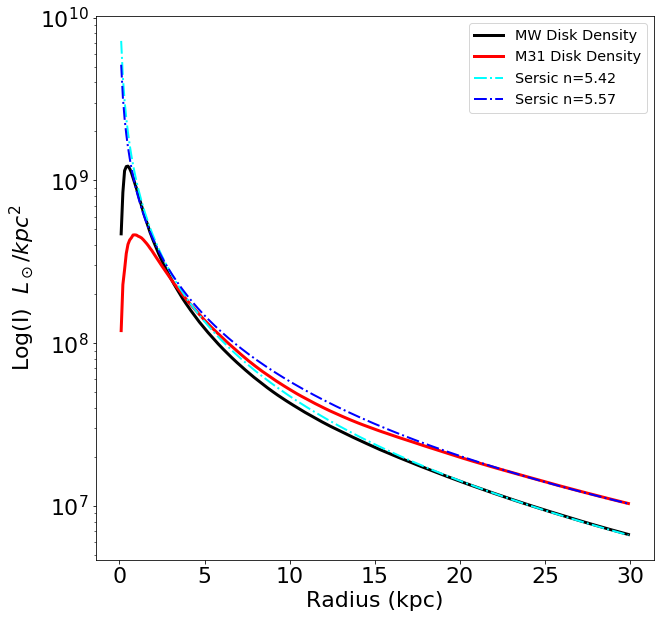

In [128]:
# Plotting the Disk density profile vs the Sersic Profile
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the disk luminosity density as a proxy for surface brightness
plt.semilogy(r,DiskIMW, color='black',linewidth=3, label='MW Disk Density')
plt.semilogy(r,DiskIM31, color='red',linewidth=3, label='M31 Disk Density')
plt.semilogy(r, BulgeSersic1(r,Re1,5.42,DiskTotalMW), color='cyan', ls='-.',lw=2,label='Sersic n=5.42')
plt.semilogy(r, BulgeSersic2(r,Re2,5.57,DiskTotalM31), color='blue', ls='-.',lw=2,label='Sersic n=5.57')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

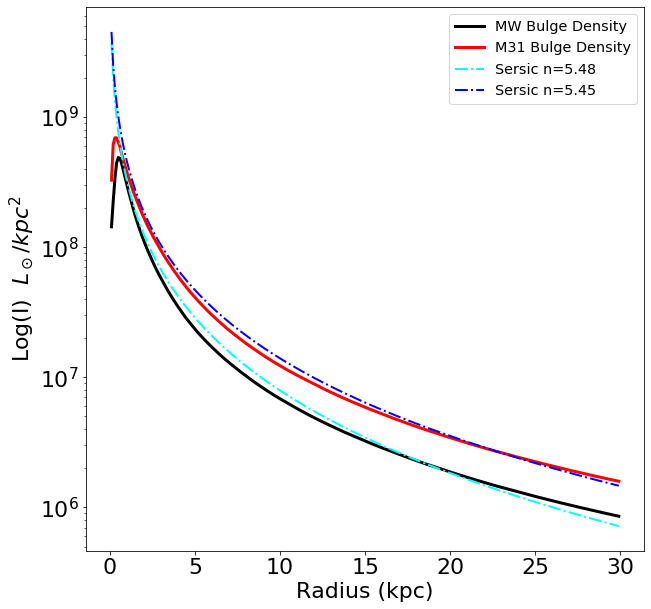

In [157]:
# Plotting the Bulge density profile vs the Sersic Profile
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brightness
plt.semilogy(r,BulgeIMW, color='black',linewidth=3, label='MW Bulge Density')
plt.semilogy(r,BulgeIM31, color='red',linewidth=3, label='M31 Bulge Density')
plt.semilogy(r, BulgeSersic3(r,Re3,5.48,BulgeTotalMW), color='cyan', ls='-.',lw=2,label='Sersic n=5.48')
plt.semilogy(r, BulgeSersic4(r,Re4,5.45,BulgeTotalM31), color='blue', ls='-.',lw=2,label='Sersic n=5.45')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')